In [4]:
import numpy as np
import torch
import torchaudio
import glob
import os
import matplotlib.pyplot as plt
import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
import glob
import os

torch.Size([32000]) [1858.9999757000478, 13559.000000000058, 25907.0] torch.Size([32000])


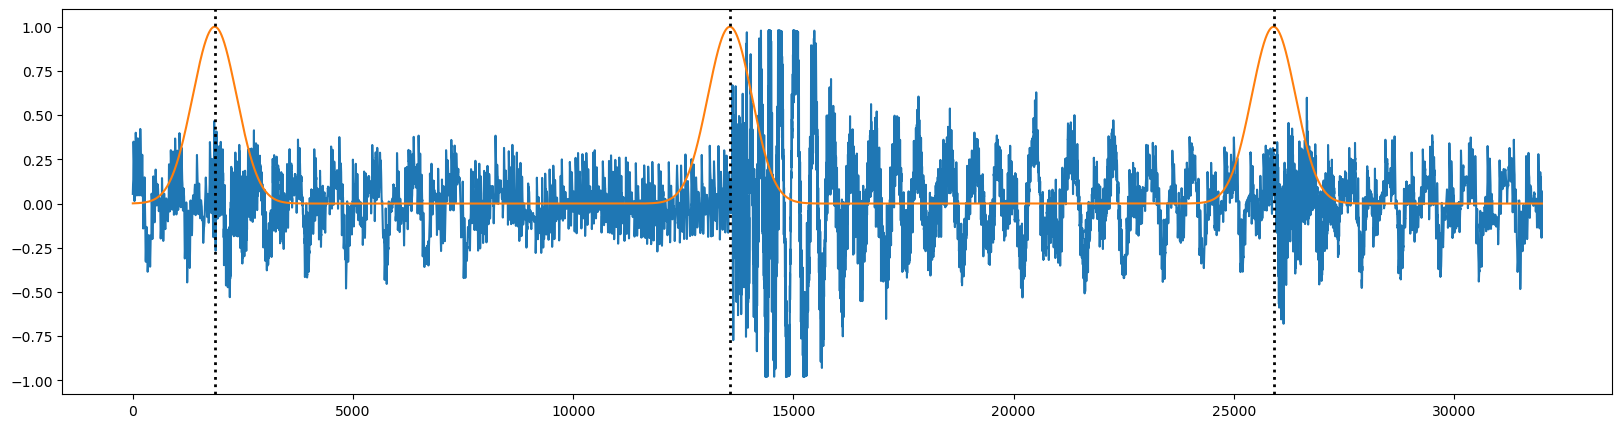

In [72]:


class OnsetDataset(Dataset):
    def __init__(self, config, device: torch.device):
        files = glob.glob(os.path.join(config.data_path, '*.wav'))[:10]
        waveforms = []
        for path in files:
            # load and normalize the audio file
            waveform, sr = torchaudio.load(path)
            waveform = waveform * 0.98 / torch.max(waveform)

            # load the onsets file
            with open(path[:-4] + '.onsets.gt', 'r') as f:
                text = f.readlines()

            # transform the text into float values
            onsets = []
            for i in text:
                onsets.append(float(i.replace('\n', '')) * sr)
            waveforms.append((waveform, sr, onsets))

        if len(waveforms) == 0:
            raise AttributeError('Data-path seems to be empty')

        self.waveforms = waveforms
        self.device = device
        self.length = config.length

    def __len__(self):
        return len(self.waveforms)

    def __getitem__(self, idx):
        waveform, sr, onsets = self.waveforms[idx]

        # find a random index and start from this point
        index = np.random.randint(low=0, high=waveform.shape[1])

        # create a waveform of specified length, with indexing and zero padding
        waveform = torch.nn.functional.pad(
            waveform[:, index: index + self.length],
            (0, max(0, self.length + index - waveform.shape[1]))
        )

        onsets = [onset - index for onset in onsets if index <= onset < index + self.length]
        sigma = config.targetSD
        targets = torch.zeros_like(waveform)
        for onset in onsets:
            current =  torch.arange(0, self.length)
            current = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((current - onset) / sigma)**2)
            targets = torch.maximum(targets, current)
        
        # normalize the targets
        if onsets:
            targets = targets / torch.max(targets)


        return waveform.to(self.device), onsets, targets.to(self.device)
    

class Config:
    pass
config = Config()
config.data_path = '/Users/timowendner/Programming/Semester 4/Music Processing/train'
config.length = 32000
config.targetSD = 500

data = OnsetDataset(config, 'cpu')
waveform, onsets, targets = data[1]
waveform = waveform[0]
targets = targets[0]
print(waveform.shape, onsets, targets.shape)

plt.figure(figsize=(20,5))
plt.plot(waveform)
plt.plot(targets)
for i in onsets:
    plt.axvline(x=i, color='black', linestyle=':', linewidth=2)
plt.show()

In [175]:
files  = glob.glob(os.path.join('train', "*.wav"))

In [176]:
waveforms = []
for file in files:
    audio, sr = torchaudio.load(file)
    waveforms.append(audio)
    if audio.shape[0] == 1:
        print(audio.shape)

torch.Size([1, 441000])
torch.Size([1, 907504])
torch.Size([1, 441001])
torch.Size([1, 1365020])
torch.Size([1, 441000])
torch.Size([1, 441001])
torch.Size([1, 897024])
torch.Size([1, 1717103])
torch.Size([1, 441001])
torch.Size([1, 322493])
torch.Size([1, 441001])
torch.Size([1, 882751])
torch.Size([1, 888832])
torch.Size([1, 1323012])
torch.Size([1, 305057])
torch.Size([1, 432768])
torch.Size([1, 1323041])
torch.Size([1, 441001])
torch.Size([1, 1586424])
torch.Size([1, 441001])
torch.Size([1, 441001])
torch.Size([1, 901763])
torch.Size([1, 441001])
torch.Size([1, 441001])
torch.Size([1, 589885])
torch.Size([1, 689262])
torch.Size([1, 669367])
torch.Size([1, 844266])
torch.Size([1, 667646])
torch.Size([1, 441001])
torch.Size([1, 250000])
torch.Size([1, 441001])
torch.Size([1, 441000])
torch.Size([1, 441001])
torch.Size([1, 441001])
torch.Size([1, 2646081])
torch.Size([1, 441001])
torch.Size([1, 1323000])
torch.Size([1, 2785944])
torch.Size([1, 1323000])
torch.Size([1, 3252719])
torch.

In [177]:
waveforms = sorted(waveforms, key=lambda x: x.shape[1])

In [178]:
length = [i.shape[1] for i in waveforms]

In [179]:
length

[123481,
 161407,
 178517,
 250000,
 301089,
 305057,
 306686,
 322493,
 349989,
 383742,
 411840,
 432768,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441000,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 441001,
 523845,
 532209,
 589885,
 617236,
 667646,
 669367,
 681712,
 689262,
 696098,
 767000,
 844266,
 882195,
 882751,
 886677,
 888832,
 897024,
 901763,
 907504,
 926789,
 1080185,
 1084844,
 1089416,
 1120807,
 1128287,
 1293137,
 1319295,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323000,
 1323001,
 1323001

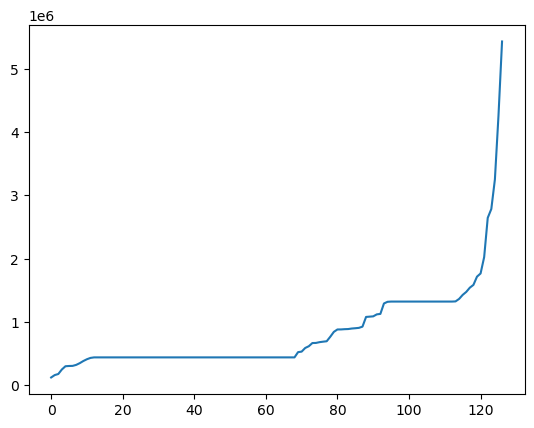

In [180]:
plt.plot(length)
plt.show()

In [181]:
with open('train/Media-100608(3.0-13.0).onsets.gt', 'r') as f:
    text = f.readlines()
onsets = []
for i in text:
    onsets.append(float(i.replace('\n', '')))


In [182]:
audio, sr = torchaudio.load('train/Media-100608(3.0-13.0).wav')
audio = audio[0].numpy()

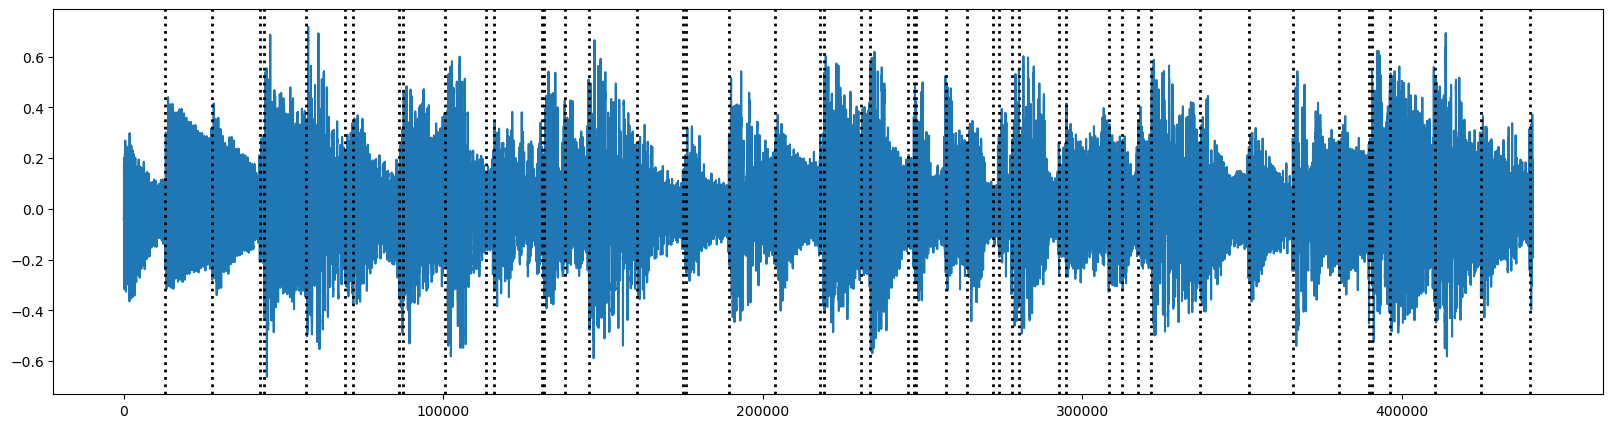

In [183]:
# fig, ax = plt.subplots(figsize=(20,5))
plt.figure(figsize=(20,5))
plt.plot(audio)
for i in onsets:
    plt.axvline(x=i*sr, color='black', linestyle=':', linewidth=2)
plt.show()

0.294603174
0.626938775
0.963628117
0.992653061
1.29015873
1.57170068
1.622448979
1.948979591
1.983854875


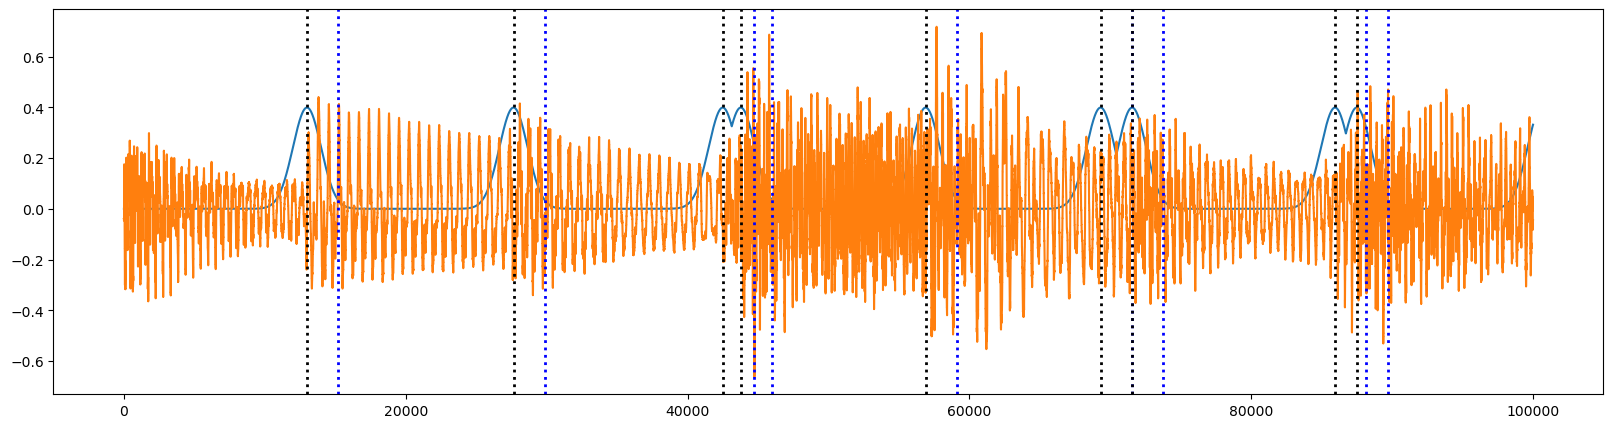

In [184]:
import scipy.stats as stats
pred = np.zeros_like(audio)
time = np.arange(audio.shape[0])
sd = 1000
for mean in onsets:
    mean = mean * sr
    dist = stats.norm.pdf(time, loc=mean, scale=sd)
    pred = np.maximum(pred, dist)

plt.figure(figsize=(20,5))
plt.plot(pred[:100000]*1000)
plt.plot(audio[:100000])
for i in onsets:
    if i*sr < 100000:
        print(i)
        plt.axvline(x=i*sr, color='black', linestyle=':', linewidth=2)
        plt.axvline(x=(i + 0.05)*sr , color='blue', linestyle=':', linewidth=2)
plt.show()

In [185]:
def get_audio_length(foldername: str):
    files  = glob.glob(os.path.join(foldername, "*.wav"))
    waveforms = []
    for file in files:
        audio, sr = torchaudio.load(file)
        audio = audio.shape[1]
        waveforms.append(audio)
    return sorted(waveforms)

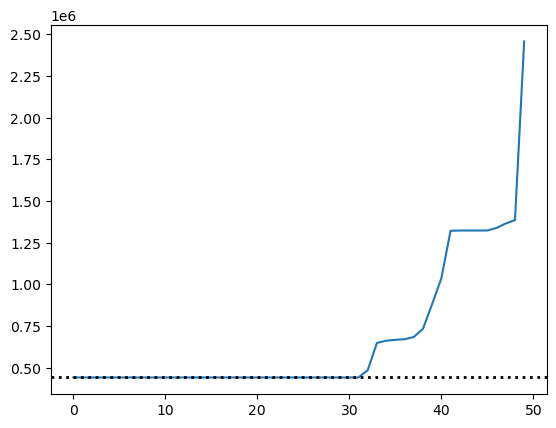

In [186]:
audiolength = get_audio_length('test')
plt.plot(audiolength)
plt.axhline(y=441000, color='black', linestyle=':', linewidth=2)
plt.show()

In [187]:
from collections import Counter
c = Counter(audiolength)
print(c)


Counter({441000: 16, 441001: 16, 485100: 1, 648270: 1, 661500: 1, 667008: 1, 670720: 1, 683550: 1, 733184: 1, 882000: 1, 1036288: 1, 1321360: 1, 1322882: 1, 1323006: 1, 1323106: 1, 1323266: 1, 1338624: 1, 1365228: 1, 1385686: 1, 2457600: 1})


In [188]:
sr

44100

In [189]:
onsets

[0.294603174,
 0.626938775,
 0.963628117,
 0.992653061,
 1.29015873,
 1.57170068,
 1.622448979,
 1.948979591,
 1.983854875,
 2.281360544,
 2.571609977,
 2.624489795,
 2.963446712,
 2.983764172,
 3.131791383,
 3.301587301,
 3.638276643,
 3.96770975,
 3.986575963,
 4.294240362,
 4.620770975,
 4.940045351,
 4.969070294,
 5.233197278,
 5.297052154,
 5.567346938,
 5.607142857,
 5.623469387,
 5.830612244,
 5.979591836,
 6.170702947,
 6.210204081,
 6.302040816,
 6.352040816,
 6.634693877,
 6.682993197,
 6.987755102,
 7.082086167,
 7.193832199,
 7.291836734,
 7.635011337,
 7.984693877,
 8.297959183,
 8.623310657,
 8.833741496,
 8.859863945,
 8.983219954,
 9.302494331,
 9.632653061,
 9.975873015]

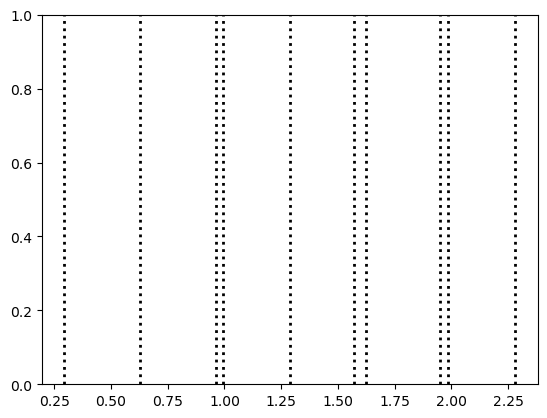

In [190]:
for i in onsets[:10]:
    plt.axvline(x=i, color='black', linestyle=':', linewidth=2)
plt.show()

In [191]:
print(onsets[:10])

[0.294603174, 0.626938775, 0.963628117, 0.992653061, 1.29015873, 1.57170068, 1.622448979, 1.948979591, 1.983854875, 2.281360544]


In [220]:
def getAudio(waveform, onsets, length=40_000):
    index = np.random.randint(low=0, high=audio.shape)[0]
    waveform = waveform[index: index + length]
    waveform = np.append(waveform, np.array([0] * (length - waveform.shape[0])))

    onsets = [onset - index for onset in onsets if index <= onset < index + length]
    
    
    targets = torch.zeros(length)
    for mean in onsets:
        sd = 100
        x = torch.arange(targets.shape[0])
        x = (1 / (sd * np.sqrt(2 * torch.pi))) * np.exp(-((x - mean)**2) / (2 * sd**2))
        targets = torch.maximum(targets, x)
    
    
    return waveform, onsets, x

newaudio = torch.tensor(audio)
newonsets = [i * sr for i in onsets]
newaudio, newonsets, targets = getAudio(newaudio, newonsets)

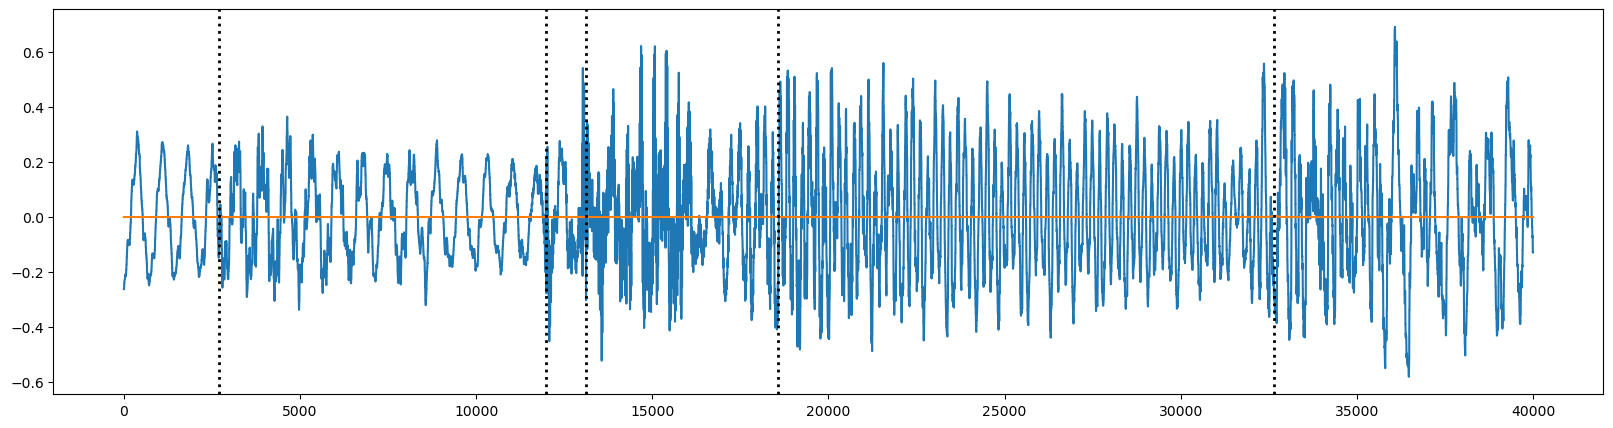

In [221]:
plt.figure(figsize=(20,5))
plt.plot(newaudio)
plt.plot(targets)
for i in newonsets:
    plt.axvline(x=i, color='black', linestyle=':', linewidth=2)
plt.show()

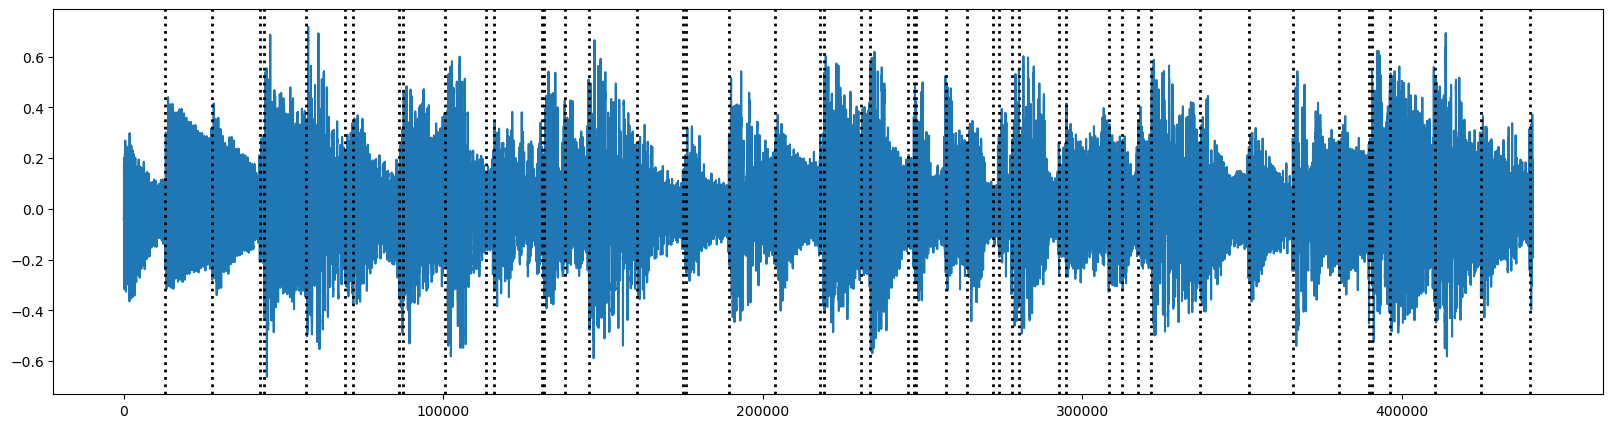

In [ ]:
# fig, ax = plt.subplots(figsize=(20,5))
plt.figure(figsize=(20,5))
plt.plot(audio)
for i in onsets:
    plt.axvline(x=i*sr, color='black', linestyle=':', linewidth=2)
plt.show()

In [57]:
# targets = torch.tensor([
#     np.max(normal(i, config.targetSD, np.array(onsets))) for i in range(self.length)
# ]).view(1, -1)
# normal = lambda x, sigma, mu: 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

a = np.arange(0, 10)
a -= 4
sigma = 1
mu = np.array((1,3, 5))
gaussianPDF = np.vectorize(lambda x: np.max(1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2)))
a = gaussianPDF(a)
print(a)

[1.48671951e-06 1.33830226e-04 4.43184841e-03 5.39909665e-02
 2.41970725e-01 3.98942280e-01 2.41970725e-01 3.98942280e-01
 2.41970725e-01 3.98942280e-01]


In [ ]:

 

import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
import numpy as np
from IPython.display import Image, Audio
from torch.utils.data import Dataset, DataLoader
import os
import glob


class AudioDataset(Dataset):
    def __init__(self, path):
        waveforms = []
        files = glob.glob(os.path.join(path, "*.wav"))
        for path in files:
            waveform, sr = torchaudio.load(path)
            waveform = waveform * 0.98 / torch.max(waveform)
            waveforms.append((1, waveform))

        if len(waveforms) == 0:
            raise AttributeError('Data-path seems to be empty')

        self.waveforms = waveforms
        self.length = config.audio_length

    def __len__(self):
        return len(self.waveforms)

    def __getitem__(self, idx):
        label, waveform = self.waveforms[idx]

        # Apply gain
        waveform = waveform * (1 - np.random.normal(0, 0.15)**2)

        # create a different starting point and roll the data over
        waveform = torch.roll(waveform, np.random.randint(waveform.shape[0]))

        return waveform
    

dataset = AudioDataset(/Users/timowendner/Programming/Semester 4/Music Processing/train)


Number of trainable parameters: 56,865, with epoch 0
Start Epoch: 1/1   18:11   (lr: 0.001)


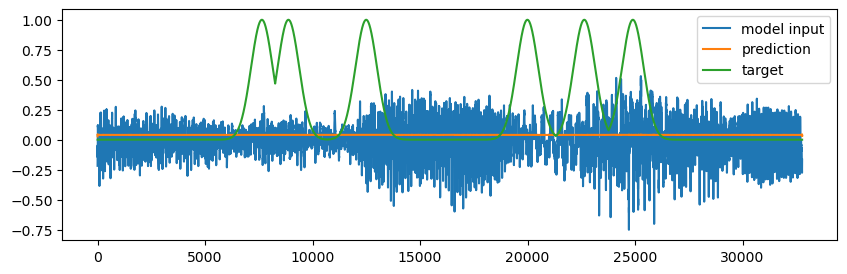

The test mse is: 0.10380747159277755


In [8]:
%run main.py --config_path='config.json' --train